In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# load MNIST dataset 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

# Using an MLP with a hidden layer to predict the number in an image

In [6]:
# create a MLP model to predict the number in the image
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())


# loss function for the MLP model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# compile model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [7]:
# train model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/Users/cjaywore/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-11-19 16:22:22.464994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8605 - loss: 0.4739 - val_accuracy: 0.9581 - val_loss: 0.1417
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9555 - loss: 0.1509 - val_accuracy: 0.9689 - val_loss: 0.1041
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9671 - loss: 0.1117 - val_accuracy: 0.9725 - val_loss: 0.0894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9713 - loss: 0.0913 - val_accuracy: 0.9737 - val_loss: 0.0823
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9758 - loss: 0.0747 - val_accuracy: 0.9769 - val_loss: 0.0769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9794 - loss: 0.0630 - val_accuracy: 0.9787 - val_loss: 0.0716
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9814 - loss: 0.0590 - val_accuracy: 0.9748 - val_loss: 0.0803
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9836 - loss: 0.0506 - val

In [8]:
# test model with an image from the testing dataset
image_num = 16 # from 0 to 10000

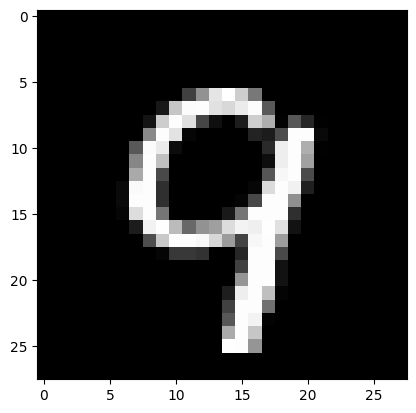

In [9]:
# First print the image the models is going to try and predict
plt.imshow(x_test[image_num], cmap='gray')
plt.show()

In [10]:
# Now see what it is the model's prediction
print("MLP Prediction: " + str(np.argmax(model.predict(tf.expand_dims(x_test[image_num], axis=0)))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
MLP Prediction: 9


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

### in the previous cell we can see that when using an MLP for images we have a lot of training parameters which can result in a problem for bigger images.

# Now, let's use a CNN to predict the number in the image

In [12]:
cnn_x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
cnn_x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

cnn_x_train = cnn_x_train.astype('float32')/255.0
cnn_x_test = cnn_x_test.astype('float32')/255.0

In [13]:
# create CNN architecture 3 Convolution layers + a Flatten layers + Fully Connected layer 
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn.add(tf.keras.layers.Dropout(0.3))
# cnn.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
# cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(10))
cnn.add(tf.keras.layers.Softmax())

# loss function
cnn_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# compile model
cnn.compile(optimizer='adam', loss=cnn_loss_fn, metrics=['accuracy'])

/Users/cjaywore/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.fit(cnn_x_train, y_train, epochs=10, validation_data=(cnn_x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5714 - loss: 1.2821 - val_accuracy: 0.9211 - val_loss: 0.2706
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9140 - loss: 0.2866 - val_accuracy: 0.9574 - val_loss: 0.1514
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9419 - loss: 0.1973 - val_accuracy: 0.9661 - val_loss: 0.1135
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9511 - loss: 0.1585 - val_accuracy: 0.9707 - val_loss: 0.0984
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9565 - loss: 0.1442 - val_accuracy: 0.9752 - val_loss: 0.0827
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9622 - loss: 0.1217 - val_accuracy: 0.9770 - val_loss: 0.0767
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9641 - loss: 0.1169 - val_accuracy: 0.9792 - val_loss: 0.0730
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9645 - loss: 0

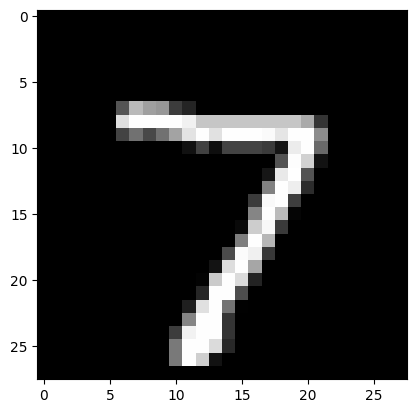

In [15]:
test_prediction_image_num = 0
image = cnn_x_test[test_prediction_image_num]
plt.imshow(image, cmap='gray')

In [16]:
print("CNN Prediction: " + str(np.argmax(cnn.predict(tf.expand_dims(cnn_x_test[test_prediction_image_num], axis=0)))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
CNN Prediction: 7


In [17]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)